# Programming Assignment 3

**Colab Free Tier has pretty strict GPU usage time limits**

**I would HIGHLY recommend doing all development on the CPU runtime instance (you can change this by clicking the dropdown arrow next to Connect (top right) --> Change Runtime Type --> CPU or T4), and then only switching to the T4 runtime (T4 is an Nvidia GPU), when you are ready to actually train the model**

## 1. Setup

Installing packages and downloading Atari environments

#### 1.1 Install Packages

This can take a few minutes to run

You will get a popup window that says:

**"Restart session: Warning: the following packages were previously imported in this runtime [_distutils_hack]. You must..."**

You can ignore this and select the "Cancel" option

In [1]:
## Install Packages for Rendering
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install imageio==2.4.1
!pip install git+https://github.com/MLivanos/colabgymrender.git

!pip install pip==20.3.4
!pip install setuptools==65.0.0 "wheel<0.40.0"
!pip3 install gym[atari]==0.19.0
!pip install autorom[accept-rom-license]
!pip install atari-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303884 sha256=2b20d2b8aa422195c91e4eb4ca6b60fb7de15673e0d24ff09af30b3153a4b3e3
  Stored in directory: /root/.cache/pip/wheels/1b/28/50/248b15750b57c6b163d89d265f242e9cf6bce0bedfea3120aa
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.37.0
    Uninstalling imageio-2.37.0:
      Successfully uninstalled imageio-2.37.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", but you have imageio 2.4.1 which is incompatible.
scikit-image 0.25.2 requires imageio!=2.35.0,>=2.33, but you have imageio 2.4.1 which is incompatible.
  Cloning https://github.com/MLivanos/

     |████████████████████████████████| 1.6 MB 3.1 MB/s 
     |████████████████████████████████| 790 kB 26.1 MB/s 
Reason for being yanked: re-release with new wheels
  Created wheel for gym: filename=gym-0.19.0-py3-none-any.whl size=1663087 sha256=a04b185067c03fcdd73a9536d837f799d95eb6f448e773976a51fa5f3ce71efc
  Stored in directory: /root/.cache/pip/wheels/2d/45/3f/5c1d10ec95d08abc288866e80481a7a7c7f8ff8cae30ff1625
  Created wheel for atari-py: filename=atari_py-0.2.6-cp311-cp311-linux_x86_64.whl size=3134628 sha256=99be91b730af59e59754894fd130debbc52372c590158fd95ec5cb18781bc6c1
  Stored in directory: /root/.cache/pip/wheels/e5/a8/6c/7ae361caaa38bb54952e886ea5731c3373c9c4fbfc35f2f836
Successfully built gym atari-py
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.1
    Uninstalling cloudpickle-3.1.1:
      Successfully uninstalled cloudpickle-3.1.1
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:

### 1.2 Download Atari environments
In the cell output, it will eventually pause on the line

**[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit**

Click on the prompt cell and enter "A"

In [2]:
## Install ROMs
! wget http://www.atarimania.com/roms/Roms.rar
! mkdir /content/ROM/
! unrar e /content/Roms.rar /content/ROM/
! python -m atari_py.import_roms /content/ROM/
! pip install ale-py

--2025-03-14 23:39:38--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 212.83.163.6
Connecting to www.atarimania.com (www.atarimania.com)|212.83.163.6|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.atarimania.com/roms/Roms.rar [following]
--2025-03-14 23:39:39--  https://www.atarimania.com/roms/Roms.rar
Connecting to www.atarimania.com (www.atarimania.com)|212.83.163.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19612325 (19M) [application/octet-stream]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  18.70M  4.71MB/s    in 4.0s    

2025-03-14 23:39:43 (4.71 MB/s) - ‘Roms.rar’ saved [19612325/19612325]


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  /content/ROM/128 in 1 Game Select ROM (Unknown) ~.bin          0%  OK 
Extracting  /content/ROM/2 in 1

### 1.3 Demo of environment

Make sure this cells runs for you and produces a video of Pacman. This is not graded, its just to make sure that all the packages installed correctly. You should see a video of MsPacman in the output cell

In [3]:
import gym
from colabgymrender.recorder import Recorder

env = gym.make("MsPacmanNoFrameskip-v4")
directory = './video'
env = Recorder(env, directory)

observation = env.reset()
terminal = False
while not terminal:
  action = env.action_space.sample()
  observation, reward, terminal, info = env.step(action)
env.play()

  if event.key is 'enter':



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


## 2. Environment Starter Code

Just run this cell. You do not need to change any code here

In [4]:
import numpy as np
from collections import deque
import gym
from gym import spaces
import cv2
cv2.ocl.setUseOpenCL(False)

class NoopResetEnv(gym.Wrapper):
    def __init__(self, env, noop_max=30):
        """Sample initial states by taking random number of no-ops on reset.
        No-op is assumed to be action 0.
        """
        gym.Wrapper.__init__(self, env)
        self.noop_max = noop_max
        self.override_num_noops = None
        self.noop_action = 0
        assert env.unwrapped.get_action_meanings()[0] == 'NOOP'

    def reset(self, **kwargs):
        """ Do no-op action for a number of steps in [1, noop_max]."""
        self.env.reset(**kwargs)
        if self.override_num_noops is not None:
            noops = self.override_num_noops
        else:
            noops = self.unwrapped.np_random.randint(1, self.noop_max + 1) #pylint: disable=E1101
        assert noops > 0
        obs = None
        for _ in range(noops):
            obs, _, done, _ = self.env.step(self.noop_action)
            if done:
                obs = self.env.reset(**kwargs)
        return obs

    def step(self, ac):
        return self.env.step(ac)

class FireResetEnv(gym.Wrapper):
    def __init__(self, env):
        """Take action on reset for environments that are fixed until firing."""
        gym.Wrapper.__init__(self, env)
        assert env.unwrapped.get_action_meanings()[1] == 'FIRE'
        assert len(env.unwrapped.get_action_meanings()) >= 3

    def reset(self, **kwargs):
        self.env.reset(**kwargs)
        obs, _, done, _ = self.env.step(1)
        if done:
            self.env.reset(**kwargs)
        obs, _, done, _ = self.env.step(2)
        if done:
            self.env.reset(**kwargs)
        return obs

    def step(self, ac):
        return self.env.step(ac)

class EpisodicLifeEnv(gym.Wrapper):
    def __init__(self, env):
        """Make end-of-life == end-of-episode, but only reset on true game over.
        Done by DeepMind for the DQN and co. since it helps value estimation.
        """
        gym.Wrapper.__init__(self, env)
        self.lives = 0
        self.was_real_done  = True

    def step(self, action):
        obs, reward, done, info = self.env.step(action)
        self.was_real_done = done
        # check current lives, make loss of life terminal,
        # then update lives to handle bonus lives
        lives = self.env.unwrapped.ale.lives()
        if lives < self.lives and lives > 0:
            # for Qbert sometimes we stay in lives == 0 condtion for a few frames
            # so its important to keep lives > 0, so that we only reset once
            # the environment advertises done.
            done = True
        self.lives = lives
        return obs, reward, done, info

    def reset(self, **kwargs):
        """Reset only when lives are exhausted.
        This way all states are still reachable even though lives are episodic,
        and the learner need not know about any of this behind-the-scenes.
        """
        if self.was_real_done:
            obs = self.env.reset(**kwargs)
        else:
            # no-op step to advance from terminal/lost life state
            obs, _, _, _ = self.env.step(0)
        self.lives = self.env.unwrapped.ale.lives()
        return obs

class MaxAndSkipEnv(gym.Wrapper):
    def __init__(self, env, skip=4):
        """Return only every `skip`-th frame"""
        gym.Wrapper.__init__(self, env)
        # most recent raw observations (for max pooling across time steps)
        self._obs_buffer = np.zeros((2,)+env.observation_space.shape, dtype=np.uint8)
        self._skip       = skip

    def reset(self):
        return self.env.reset()

    def step(self, action):
        """Repeat action, sum reward, and max over last observations."""
        total_reward = 0.0
        done = None
        for i in range(self._skip):
            obs, reward, done, info = self.env.step(action)
            if i == self._skip - 2: self._obs_buffer[0] = obs
            if i == self._skip - 1: self._obs_buffer[1] = obs
            total_reward += reward
            if done:
                break
        # Note that the observation on the done=True frame
        # doesn't matter
        max_frame = self._obs_buffer.max(axis=0)

        return max_frame, total_reward, done, info

    def reset(self, **kwargs):
        return self.env.reset(**kwargs)

class ClipRewardEnv(gym.RewardWrapper):
    def __init__(self, env):
        gym.RewardWrapper.__init__(self, env)

    def reward(self, reward):
        """Bin reward to {+1, 0, -1} by its sign."""
        return np.sign(reward)

class WarpFrame(gym.ObservationWrapper):
    def __init__(self, env):
        """Warp frames to 84x84 as done in the Nature paper and later work."""
        gym.ObservationWrapper.__init__(self, env)
        self.width = 84
        self.height = 84
        self.observation_space = spaces.Box(low=0, high=255,
            shape=(self.height, self.width, 1), dtype=np.uint8)

    def observation(self, frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame = cv2.resize(frame, (self.width, self.height), interpolation=cv2.INTER_AREA)
        return frame[:, :, None]

class FrameStack(gym.Wrapper):
    def __init__(self, env, k):
        """Stack k last frames.
        Returns lazy array, which is much more memory efficient.
        See Also
        --------
        baselines.common.atari_wrappers.LazyFrames
        """
        gym.Wrapper.__init__(self, env)
        self.k = k
        self.frames = deque([], maxlen=k)
        shp = env.observation_space.shape
        self.observation_space = spaces.Box(low=0, high=255, shape=(shp[0], shp[1], shp[2] * k), dtype=np.uint8)

    def reset(self):
        ob = self.env.reset()
        for _ in range(self.k):
            self.frames.append(ob)
        return self._get_ob()

    def step(self, action):
        ob, reward, done, info = self.env.step(action)
        self.frames.append(ob)
        return self._get_ob(), reward, done, info

    def _get_ob(self):
        assert len(self.frames) == self.k
        return LazyFrames(list(self.frames))

class ScaledFloatFrame(gym.ObservationWrapper):
    def __init__(self, env):
        gym.ObservationWrapper.__init__(self, env)

    def observation(self, observation):
        # careful! This undoes the memory optimization, use
        # with smaller replay buffers only.
        return np.array(observation).astype(np.float32) / 255.0

class LazyFrames(object):
    def __init__(self, frames):
        """This object ensures that common frames between the observations are only stored once.
        It exists purely to optimize memory usage which can be huge for DQN's 1M frames replay
        buffers.
        This object should only be converted to numpy array before being passed to the model.
        You'd not believe how complex the previous solution was."""
        self._frames = frames
        self._out = None

    def _force(self):
        if self._out is None:
            self._out = np.concatenate(self._frames, axis=2)
            self._frames = None
        return self._out

    def __array__(self, dtype=None):
        out = self._force()
        if dtype is not None:
            out = out.astype(dtype)
        return out

    def __len__(self):
        return len(self._force())

    def __getitem__(self, i):
        return self._force()[i]

def make_atari(env_id):
    env = gym.make(env_id)
    assert 'NoFrameskip' in env.spec.id
    env = NoopResetEnv(env, noop_max=30)
    env = MaxAndSkipEnv(env, skip=4)
    return env

def wrap_deepmind(env, episode_life=True, clip_rewards=True, frame_stack=False, scale=False):
    """Configure environment for DeepMind-style Atari.
    """
    if episode_life:
        env = EpisodicLifeEnv(env)
    if 'FIRE' in env.unwrapped.get_action_meanings():
        env = FireResetEnv(env)
    env = WarpFrame(env)
    if scale:
        env = ScaledFloatFrame(env)
    if clip_rewards:
        env = ClipRewardEnv(env)
    if frame_stack:
        env = FrameStack(env, 4)
    return env



class ImageToPyTorch(gym.ObservationWrapper):
    """
    Image shape to num_channels x weight x height
    """
    def __init__(self, env):
        super(ImageToPyTorch, self).__init__(env)
        old_shape = self.observation_space.shape
        self.observation_space = gym.spaces.Box(low=0.0, high=1.0, shape=(old_shape[-1], old_shape[0], old_shape[1]), dtype=np.uint8)

    def observation(self, observation):
        return np.swapaxes(observation, 2, 0)


def wrap_pytorch(env):
    return ImageToPyTorch(env)

## 3. Deep Q Network

### 3.1 Implementing the Q Learner

Here is the basis of a QLearner.

You need to fill in some missing pieces (the three areas marked "TODO"):

1. In QLearner.act() : Given a state, write code to forward that state through the network, and then select the mode with the highest Q value

2. In compute_td_loss() : Write code to compute the td_loss

3. In ReplayBuffer.sample() : Write code to sample and return a batch of trials from the RelayBuffer to train on


This is the code you will be graded on

In [5]:
from collections import deque
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.autograd as autograd
import math, random
USE_CUDA = torch.cuda.is_available()
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

class QLearner(nn.Module):
    def __init__(self, env, num_frames, batch_size, gamma, replay_buffer):
        super(QLearner, self).__init__()
        self.batch_size = batch_size
        self.gamma = gamma
        self.num_frames = num_frames
        self.replay_buffer = replay_buffer
        self.env = env
        self.input_shape = self.env.observation_space.shape
        self.num_actions = self.env.action_space.n
        self.features = nn.Sequential(
            nn.Conv2d(self.input_shape[0], 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )
        self.fc = nn.Sequential(
            nn.Linear(self.feature_size(), 512),
            nn.ReLU(),
            nn.Linear(512, self.num_actions)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

    def feature_size(self):
            return self.features(autograd.Variable(torch.zeros(1, *self.input_shape))).view(1, -1).size(1)

    def act(self, state, epsilon):
        if random.random() > epsilon:
            state = Variable(torch.FloatTensor(np.float32(state)).unsqueeze(0), requires_grad=True)
            # TODO 1. : Given state, write code to get the Q values and chose an action

            Q = self(state).detach().cpu().numpy()
            action = np.argmax(Q)
        else:
            action = random.randrange(self.env.action_space.n)
        return action

    def copy_from(self, target):
        self.load_state_dict(target.state_dict())


def compute_td_loss(model, target_model, batch_size, gamma, replay_buffer):
    state, action, reward, next_state, done = replay_buffer.sample(batch_size)
    state = Variable(torch.FloatTensor(np.float32(state)))
    next_state = Variable(torch.FloatTensor(np.float32(next_state)).squeeze(1), requires_grad=True)
    action = Variable(torch.LongTensor(action))
    reward = Variable(torch.FloatTensor(reward))
    done = Variable(torch.FloatTensor(done))
    # TODO: Implement the Q-Learning loss (if you don't know the loss equation, refernce the Mitchell reinforcement learning text or lecture slides )

    Possible_Qs = model(state)
    Q = Possible_Qs.gather(1, action.unsqueeze(1)).squeeze(1)
    Possible_QS_primes = target_model(next_state).detach()
    Qs_prime = Possible_QS_primes.max(1)[0]
    Equation = reward + gamma * Qs_prime * (1 - done)
    loss = F.mse_loss(Q, Equation)

    return loss


class ReplayBuffer(object):
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        state = np.expand_dims(state, 0)
        next_state = np.expand_dims(next_state, 0)
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):
        # TODO: Randomly sampling data batch_size samples from the buffer

        import operator
        samples = random.sample(self.buffer, batch_size)
        state_sample, action, reward, next_state_sample, done = zip(*samples)
        state = tuple(map(operator.itemgetter(0), state_sample))
        next_state = tuple(map(tuple, next_state_sample))

        return state, action, reward, next_state, done

    def __len__(self):
        return len(self.buffer)

### 3.2 Testing Your Model

This cell is just to make sure that your model compiles and runs before training.

The pretrained model will loose every game (or almost every game), but will score a few points.

The video outputed at the end of this cell should show your DQN scoring a few points if you have implemented act correctly

**This cell is not graded, just for your own testing**

Note: Test is intentionally before train because you are provided a pretrained - but imperect - model. You can go back and use this code to test your model after you train it.

In [6]:
# Test_dqn
import sys
from colabgymrender.recorder import Recorder
import math, random
import gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore")
USE_CUDA = torch.cuda.is_available()

env_id = "PongNoFrameskip-v4"
env = make_atari(env_id)
env = wrap_deepmind(env)
env = wrap_pytorch(env)
directory = './video'
env = Recorder(env, directory)

num_frames = 1000000
# num_frames = 500000

batch_size = 32
gamma = 0.99

replay_initial = 10000
replay_buffer = ReplayBuffer(100000)
# specify the path of the testing model
from google.colab import drive
drive.mount('/content/drive')
pthname = '/content/drive/My Drive/model_pretrained.pth'

model = QLearner(env, num_frames, batch_size, gamma, replay_buffer)
model.load_state_dict(torch.load(pthname, map_location='cpu'))
model.eval()
if USE_CUDA:
    model = model.cuda()
    print("Using cuda")

env.seed(1)
state = env.reset()
done = False
games_won = 0

while not done:
    action = model.act(state, 0)
    state, reward, done, _ = env.step(action)
    if reward != 0:
        print(reward)
    if reward == 1:
        games_won += 1

print("Points Won: {}".format(games_won))
env.play()
try:
    sys.exit(0)
except:
    pass

Mounted at /content/drive
Using cuda
-1.0
1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
-1.0
1.0
-1.0
1.0
-1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
-1.0
1.0
-1.0
-1.0
Points Won: 17
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


## 4. Train your Model

Here is where you will load in the pretained model and continue training it.

**The default parameters below can get you to a tying DQN in about 100,000 frames if you have implemented act, replay buffer, and the loss calculation corrently. However, you are welcome to change them.**

You will need to mount your Google Drive and specify the correct path to where you uploaded `model_pretrained.pth`

In [7]:
import math, random
import gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import torch.nn.functional as F
USE_CUDA = torch.cuda.is_available()


env_id = "PongNoFrameskip-v4"
env = make_atari(env_id)
env = wrap_deepmind(env)
env = wrap_pytorch(env)

# You can change these parameters
num_frames = 250000
batch_size = 32
gamma = 0.99
record_idx = 10000

replay_initial = 10000
replay_buffer = ReplayBuffer(100000)
model = QLearner(env, num_frames, batch_size, gamma, replay_buffer)

# specify the path of the testing model

from google.colab import drive
drive.mount('/content/drive')
pthname = '/content/drive/My Drive/model_pretrained.pth'

model.load_state_dict(torch.load(pthname, map_location='cpu'))

target_model = QLearner(env, num_frames, batch_size, gamma, replay_buffer)
target_model.copy_from(model)

optimizer = optim.Adam(model.parameters(), lr=0.00001)
if USE_CUDA:
    model = model.cuda()
    target_model = target_model.cuda()
    print("Using cuda")

# You can change these parameters
epsilon_start = 0.05
epsilon_final = 0.01
epsilon_decay = 30000
epsilon_by_frame = lambda frame_idx: epsilon_final + (epsilon_start - epsilon_final) * math.exp(-1. * frame_idx / epsilon_decay)

losses = []
all_rewards = []
episode_reward = 0

state = env.reset()

for frame_idx in range(1, num_frames + 1):

    epsilon = epsilon_by_frame(frame_idx)
    action = model.act(state, epsilon)

    next_state, reward, done, _ = env.step(action)
    replay_buffer.push(state, action, reward, next_state, done)

    state = next_state
    episode_reward += reward

    if done:
        state = env.reset()
        all_rewards.append((frame_idx, episode_reward))
        episode_reward = 0

    if len(replay_buffer) > replay_initial:
        loss = compute_td_loss(model, target_model, batch_size, gamma, replay_buffer)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append((frame_idx, loss.data.cpu().numpy()))

    if frame_idx % 10000 == 0 and len(replay_buffer) <= replay_initial:
        print('#Frame: %d, preparing replay buffer' % frame_idx)

    if frame_idx % 10000 == 0 and len(replay_buffer) > replay_initial:
        print('#Frame: %d, Loss: %f' % (frame_idx, np.mean(losses, 0)[1]))
        print('Last-10 average reward: %f' % np.mean(all_rewards[-10:], 0)[1])

    if frame_idx % 50000 == 0:
        target_model.copy_from(model)



# set your model path
model_name = '250000_frames'
saved_path = "/content/drive/My Drive/" + model_name + "_model.pth"
# save your final model
torch.save(model.state_dict(), saved_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using cuda
#Frame: 10000, preparing replay buffer
#Frame: 20000, Loss: 0.006151
Last-10 average reward: -3.285714
#Frame: 30000, Loss: 0.004866
Last-10 average reward: -3.800000
#Frame: 40000, Loss: 0.004360
Last-10 average reward: -6.400000
#Frame: 50000, Loss: 0.004103
Last-10 average reward: -7.100000
#Frame: 60000, Loss: 0.004985
Last-10 average reward: -6.700000
#Frame: 70000, Loss: 0.004989
Last-10 average reward: -5.100000
#Frame: 80000, Loss: 0.004868
Last-10 average reward: -6.200000
#Frame: 90000, Loss: 0.004742
Last-10 average reward: -5.500000
#Frame: 100000, Loss: 0.004604
Last-10 average reward: -3.700000
#Frame: 110000, Loss: 0.004897
Last-10 average reward: -0.800000
#Frame: 120000, Loss: 0.004914
Last-10 average reward: -2.400000
#Frame: 130000, Loss: 0.004855
Last-10 average reward: -0.600000
#Frame: 140000, Loss: 0.004780
Last-10 average re

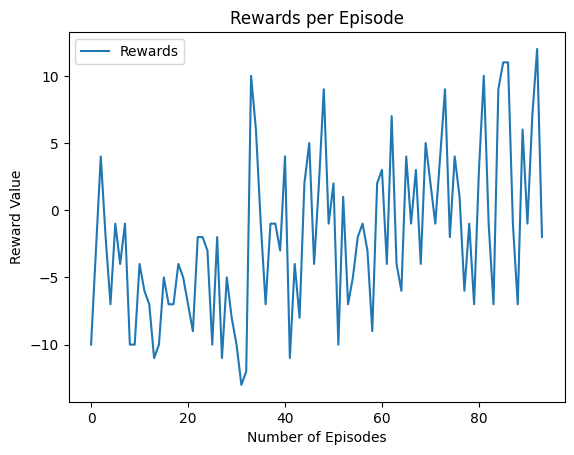

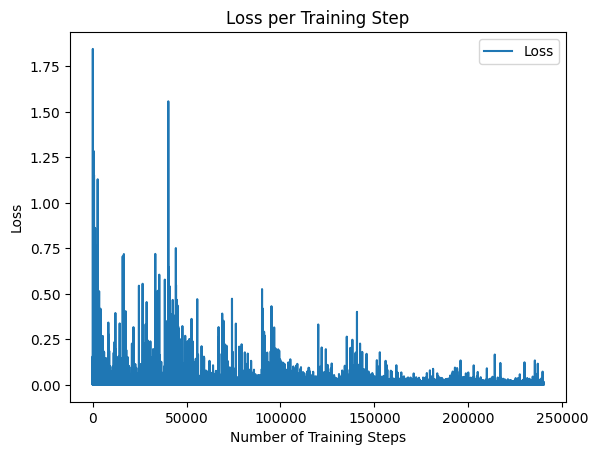

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# Each entry is a tuple of (frame_idx, reward) - we only need the reward
only_rewards = [x[1] for x in all_rewards]

# Each entry is a tuple of (frame_idx, loss) - we only need the loss
only_losses = [x[1] for x in losses]

# Process
plt.plot(only_rewards, label='Rewards')
plt.title('Rewards per Episode')
plt.legend()
plt.xlabel('Number of Episodes')
plt.ylabel('Reward Value')
plt.show()

plt.plot(only_losses, label='Loss')
plt.title('Loss per Training Step')
plt.legend()
plt.xlabel('Number of Training Steps')
plt.ylabel('Loss')
plt.show()